# Artificial Satellites
This is a final portfolio project in the Data Analist path career.

The scope of this project is analyze the kind of artificial satelites that actually there are around the earth.

The data used for this project is available [here](https://www.ucsusa.org/sites/default/files/2021-11/UCS-Satellite-Database-9-1-2021.txt) and that belongs to [Union of Concerned Scientists](https://www.ucsusa.org/resources/satellite-database) 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
satellites = pd.read_csv('UCS-Satellite-Database-9-1-2021.txt', delimiter='\t')

# delete empty rows
satellites.dropna(subset=['Current Official Name of Satellite'], inplace=True)

# delete empty columns or columns with little data
limit = int(len(satellites) * 0.05)
satellites.dropna(axis=1, thresh=limit, inplace=True)

## How many satellites have been launched in the last ten years? 

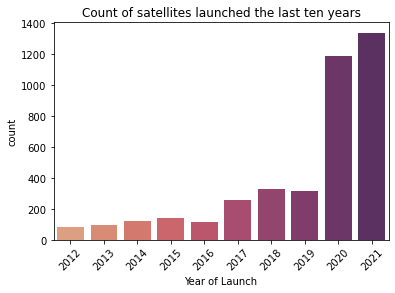

In [3]:
# cast Date of Launch to datetime
satellites['Date of Launch'] = satellites['Date of Launch'].apply(pd.to_datetime)

# create a new column with a year of launch
satellites['Year of Launch'] = satellites['Date of Launch'].dt.year

# define filter for last ten years 
filter_ten_year_ago = satellites['Date of Launch'] >= (satellites['Date of Launch'].max() - pd.offsets.YearBegin(n=10))

# grafic
ax = plt.subplot()
sns.countplot(x='Year of Launch', data=satellites[filter_ten_year_ago], palette='flare')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title("Count of satellites launched the last ten years")

plt.show()

## What are the main purposes of satellites launched the last five years?

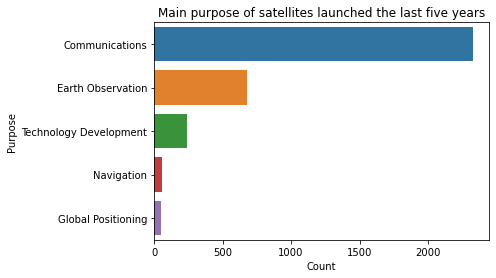

In [4]:
# define filter for last five years 
filter_five_year_ago = satellites['Date of Launch'] >= (satellites['Date of Launch'].max() - pd.offsets.YearBegin(n=5))

# count the purpose for each satellite and select the first five
purposes = satellites[filter_five_year_ago]['Purpose'].str.get_dummies(sep='/')\
                    .melt(var_name='Purpose', value_name='Count')\
                    .groupby(by='Purpose').Count.sum()\
                    .nlargest(5)\
                    .reset_index()

# grafic
plt.clf()
sns.barplot(x='Count', y='Purpose', data=purposes)

plt.title("Main purpose of satellites launched the last five years")

plt.show()

## How long is the expected lifetime of the satellites have been launched last two year?

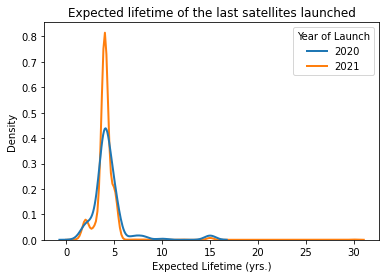

In [5]:
# define filter for last two years 
filter_five_year_ago = satellites['Date of Launch'] >= (satellites['Date of Launch'].max() - pd.offsets.YearBegin(n=2))

#grafic
plt.clf()
sns.kdeplot(data=satellites[filter_five_year_ago], x="Expected Lifetime (yrs.)", hue="Year of Launch", common_norm=False, palette="tab10", linewidth=2)

plt.title("Expected lifetime of the last satellites launched")
plt.show()

## How many satellites have exceeded their lifetime

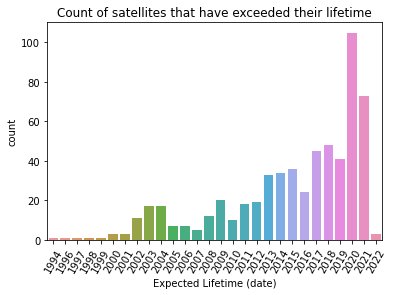

In [6]:
# create a new column with expected lifetime in days
satellites["Expected Lifetime (days)"] = (satellites["Expected Lifetime (yrs.)"] * 365.25).round().astype('Int64')

# cast a new column to Timedelta
satellites["Expected Lifetime (days)"] = satellites["Expected Lifetime (days)"].apply(lambda x: pd.to_timedelta(str(x) + ' days') if pd.notna(x) else np.nan)

# create a new column with de date of lifetime
satellites["Expected Lifetime (date)"] = satellites["Date of Launch"] + satellites["Expected Lifetime (days)"]

data_filtered = satellites[satellites["Expected Lifetime (date)"] < pd.Timestamp.today()]\

# grafic
plt.clf()
ax = plt.subplot()
sns.countplot(x=data_filtered["Expected Lifetime (date)"].dt.year)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.title("Count of satellites that have exceeded their lifetime")

plt.show()
